# Sample Super Store
## by Lamyaa Sameh

## Preliminary Wrangling

> This data set includes information about a superstore sales, profit and location covering the United states 

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import pyplot
%matplotlib inline

> Loading dataset and describing its properties through the questions below.
Trying and motivating the exploration goals through this section.

In [45]:
df_superstore = pd.read_csv('SampleSuperstore.csv')
df_superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
df_superstore.shape

(9994, 13)

In [47]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [48]:
df_superstore.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [49]:
df_superstore['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [50]:
df_superstore['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [51]:
df_superstore['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [52]:
df_superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [53]:
sum(df_superstore.duplicated())

17

In [54]:
df_superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Tidiness issues :

#### Removing Duplicates from dataframe

In [55]:
df_superstore = df_superstore.drop_duplicates()

In [56]:
sum(df_superstore.duplicated())

0

In [57]:
df_superstore.shape

(9977, 13)

### What is the structure of your dataset?

> This dataset contains 9977 rows and 13 columns 

### What is/are the main feature(s) of interest in your dataset?

> The features of interest are: City, State, Sales and Profit.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support :'Segment' is to investigate about the average Profit.
> i expect an effect on the average profit and the sales taken by the type of segment.
   

I'll start by looking at the distribution of the main variables of interest:Region ,City and States 

Trying to find the weak area where you can work to make profit

#### Regions Distribution 

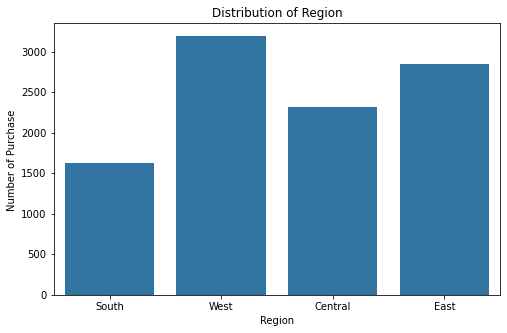

In [58]:
plt.figure(figsize=[8, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_superstore, x = 'Region', color = default_color)

plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Number of Purchase ');

The most weak regions are the South and the central

#### States distribution 

In [81]:
State_counts = df_superstore['State'].value_counts()
State_counts

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [95]:
State_order = State_counts.index[-5:]
State_order

Index(['District of Columbia', 'Maine', 'North Dakota', 'West Virginia',
       'Wyoming'],
      dtype='object')

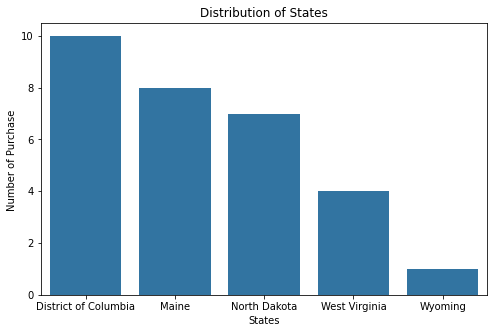

In [96]:
plt.figure(figsize=[8, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_superstore, x = 'State', color = default_color ,order= State_order)

plt.title('Distribution of States')
plt.xlabel('States')
plt.ylabel('Number of Purchase ');

The last states are Wyoming, West virgina and North dakota

#### Cities distribution 

In [86]:
city_counts = df_superstore['City'].value_counts()
city_counts

New York City     914
Los Angeles       746
Philadelphia      536
San Francisco     506
Seattle           424
                 ... 
Keller              1
Grand Island        1
Jefferson City      1
Lake Elsinore       1
La Quinta           1
Name: City, Length: 531, dtype: int64

In [97]:
city_order = city_counts.index[-5:]
city_order

Index(['Keller', 'Grand Island', 'Jefferson City', 'Lake Elsinore',
       'La Quinta'],
      dtype='object')

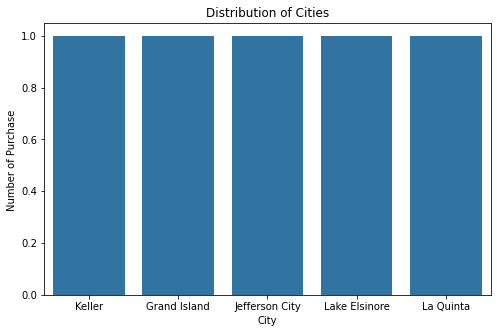

In [98]:
plt.figure(figsize=[8, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_superstore, x = 'City', color = default_color , order = city_order)

plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Number of Purchase ');

The least cities are Keller , Grand island , Jefferson City ,lake elsinore and la Quinta